In [5]:
import numpy as np
from skimage import io
from veg_index import Image_Multi
import matplotlib.pyplot as plt
from matplotlib import path

/home/dlsaavedra/anaconda3/envs/new/lib/python3.7/site-packages/pysal/__init__.py:65: VisibleDeprecationWarning: PySAL's API will be changed on 2018-12-31. The last release made with this API is version 1.14.4. A preview of the next API version is provided in the `pysal` 2.0 prelease candidate. The API changes and a guide on how to change imports is provided at https://migrating.pysal.org
  ), VisibleDeprecationWarning)


# Read Images

In [6]:
im_red_path = "Barrack A/result_Red.tif"
im_green_path = "Barrack A//result_Green.tif"
im_blue_path = "Barrack A/result_Blue.tif"
im_nir_path = "Barrack A/result_NIR.tif"
im_rededge_path = "Barrack A/result_RedEdge.tif"

im_multi = Image_Multi(im_red_path, im_green_path, im_blue_path, im_nir_path, im_rededge_path)

Text(0.5, 1.05, 'RedEdge Band')

<Figure size 1080x1080 with 0 Axes>

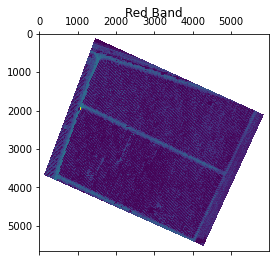

<Figure size 1080x1080 with 0 Axes>

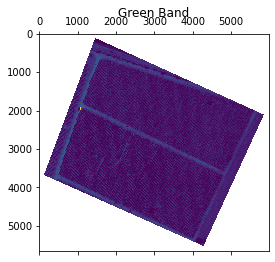

<Figure size 1080x1080 with 0 Axes>

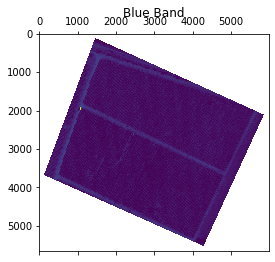

<Figure size 1080x1080 with 0 Axes>

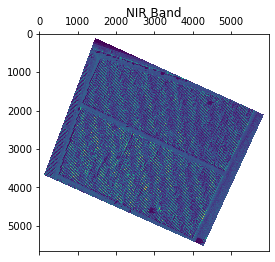

<Figure size 1080x1080 with 0 Axes>

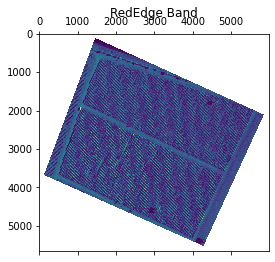

In [3]:
plt.figure(figsize=(15, 15))
im_multi.im_red.plot()
plt.title('Red Band')


plt.figure(figsize=(15, 15))
im_multi.im_green.plot()
plt.title('Green Band')


plt.figure(figsize=(15, 15))
im_multi.im_blue.plot()
plt.title('Blue Band')



plt.figure(figsize=(15, 15))
im_multi.im_nir.plot()
plt.title('NIR Band')



plt.figure(figsize=(15, 15))
im_multi.im_rededge.plot()
plt.title('RedEdge Band')



Text(0.5, 1.05, 'OSAVI')

<Figure size 1080x1080 with 0 Axes>

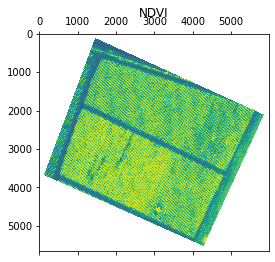

<Figure size 1080x1080 with 0 Axes>

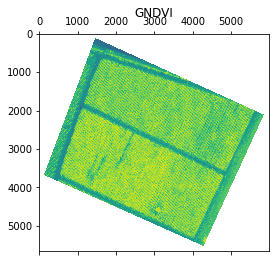

<Figure size 1080x1080 with 0 Axes>

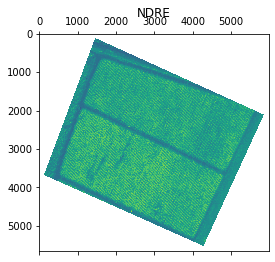

<Figure size 1080x1080 with 0 Axes>

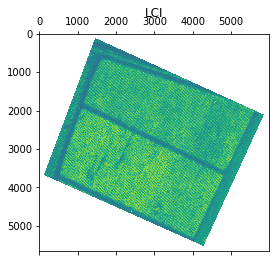

<Figure size 1080x1080 with 0 Axes>

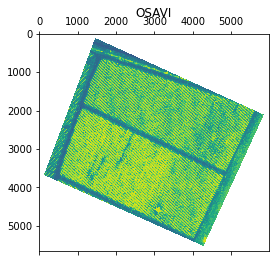

In [4]:
plt.figure(figsize=(15, 15))
im_multi.NDVI().plot()
plt.title('NDVI')

plt.figure(figsize=(15, 15))
im_multi.GNDVI().plot()
plt.title('GNDVI')

plt.figure(figsize=(15, 15))
im_multi.NDRE().plot()
plt.title('NDRE')

plt.figure(figsize=(15, 15))
im_multi.LCI().plot()
plt.title('LCI')

plt.figure(figsize=(15, 15))
im_multi.OSAVI().plot()
plt.title('OSAVI')

# Write Images

In [5]:
#im_multi.NDVI().to_tiff('Barrack A/result_NDVI')
#im_multi.GNDVI().to_tiff('Barrack A/result_GNDVI')
#im_multi.NDRE().to_tiff('Barrack A/result_NDRE')
#im_multi.LCI().to_tiff('Barrack A/result_LCI')
#im_multi.OSAVI().to_tiff('Barrack A/result_OSAVI')


#  Histogram

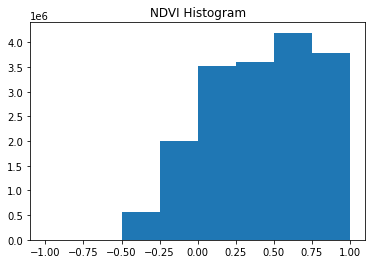

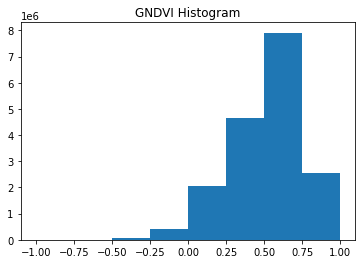

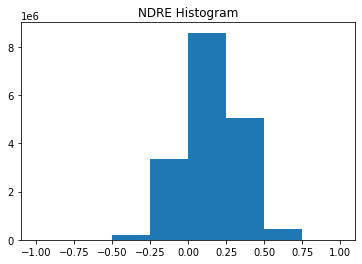

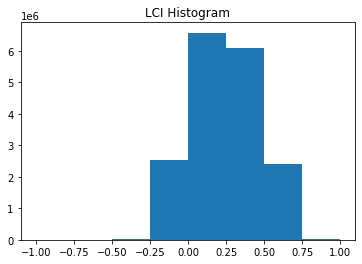

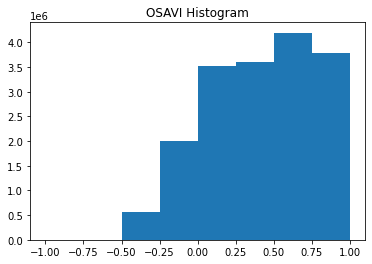

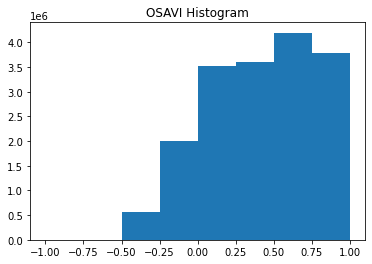

In [19]:
n_bins = 8

plt.figure(1)
NDVI_raster = im_multi.NDVI().raster
NDVI_raster = 2. * (NDVI_raster - np.ma.min(NDVI_raster)) / np.ma.ptp(NDVI_raster) - 1
plt.hist(NDVI_raster[~np.isnan(NDVI_raster)], bins = n_bins)
plt.title('NDVI Histogram')
plt.savefig('Barrack A/NDVI_Histogram_'+ str(n_bins))

plt.figure(2)
GNDVI_raster = im_multi.GNDVI().raster
GNDVI_raster = 2. * (GNDVI_raster - np.ma.min(GNDVI_raster)) / np.ma.ptp(GNDVI_raster) - 1
plt.hist(GNDVI_raster[~np.isnan(GNDVI_raster)], bins = n_bins)
plt.title('GNDVI Histogram')
plt.savefig('Barrack A/GNDVI_Histogram_'+ str(n_bins))

plt.figure(3)
NDRE_raster = im_multi.NDRE().raster
NDRE_raster = 2. * (NDRE_raster - np.ma.min(NDRE_raster)) / np.ma.ptp(NDRE_raster) - 1
plt.hist(NDRE_raster[~np.isnan(NDRE_raster)], bins = n_bins)
plt.title('NDRE Histogram')
plt.savefig('Barrack A/NDRE_Histogram_'+ str(n_bins))

plt.figure(4)
LCI_raster = im_multi.LCI().raster
LCI_raster = 2. * (LCI_raster - np.ma.min(LCI_raster)) / np.ma.ptp(LCI_raster) - 1
plt.hist(LCI_raster[~np.isnan(LCI_raster)], bins = n_bins)
plt.title('LCI Histogram')
plt.savefig('Barrack A/LCI_Histogram_'+ str(n_bins))

plt.figure(5)
OSAVI_raster = im_multi.OSAVI().raster
OSAVI_raster = 2. * (OSAVI_raster - np.ma.min(OSAVI_raster)) / np.ma.ptp(OSAVI_raster) - 1
plt.hist(OSAVI_raster[~np.isnan(OSAVI_raster)], bins = n_bins)
plt.title('OSAVI Histogram')
plt.savefig('Barrack A/OSAVI_Histogram_'+ str(n_bins))

plt.figure(6)
OSAVI_raster = im_multi.OSAVI_16().raster
OSAVI_raster = 2. * (OSAVI_raster - np.ma.min(OSAVI_raster)) / np.ma.ptp(OSAVI_raster) - 1
plt.hist(OSAVI_raster[~np.isnan(OSAVI_raster)], bins = n_bins)
plt.title('OSAVI_16 Histogram')
plt.savefig('Barrack A/OSAVI_16_Histogram_'+ str(n_bins))

# Stadistics

In [4]:
L = ["min: ", "max: ", "range: ", "median: ", "mean: ", "desv: "]  
name = ["NDVI", "GNDVI", "NDRE", "LCI", "OSAVI", "OSAVI_16"]
func_raster = [im_multi.NDVI, im_multi.GNDVI, im_multi.NDRE, im_multi.LCI, im_multi.OSAVI, im_multi.OSAVI_16]


for name, f in zip(name,func_raster):
    raster = f().raster
    raster = 2. * (raster - np.min(raster)) / np.ptp(raster) - 1
    statistics = [np.ma.min(raster), np.ma.max(raster), np.ma.ptp(raster), 
                  np.ma.median(raster), np.ma.mean(raster), np.ma.std(raster)]
    
    file1 = open(name + "_statistics.txt","w") 
    file1.writelines([L[i]+ str(statistics[i]) + "\n" for i in range(len(L))]) 
    file1.close() #to change file access modes 
    print(name)
    for i in [L[i]+ str(statistics[i]) + "\n" for i in range(len(L))]: print(i)

NDVI
min: -1.0

max: 1.0

range: 2.0

median: 0.43380404

mean: 0.40734911515604977

desv: 0.3400195673368101

GNDVI
min: -1.0

max: 1.0

range: 2.0

median: 0.5627533

mean: 0.5166568077732242

desv: 0.23335588915639202

NDRE
min: -1.0

max: 1.0

range: 2.0

median: 0.14934886

mean: 0.1545318223150684

desv: 0.18871261802187547

LCI
min: -1.0

max: 1.0

range: 2.0

median: 0.23806405

mean: 0.24185040483984308

desv: 0.21691573767712174

OSAVI
min: -1.0

max: 1.0

range: 2.0

median: 0.4337834

mean: 0.40733582704121735

desv: 0.3400169203318041

OSAVI_16
min: -1.0

max: 1.0

range: 2.0

median: 0.4337834

mean: 0.40733577037548246

desv: 0.340016897516072



# Segmentation


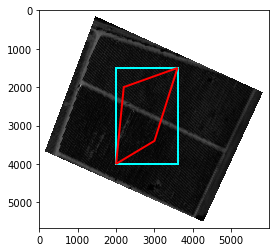

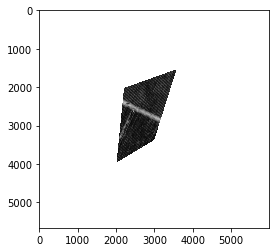

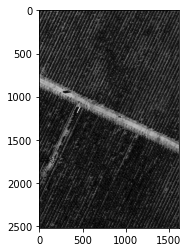

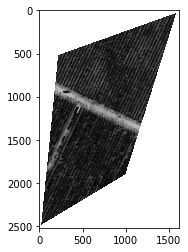

In [3]:
import matplotlib.patches as patches
import georasters as gr

epsilon = 10
Red=im_multi.im_red
List_P = [(2200,2000), (2000, 4000), (3000, 3400), (3600, 1500)]

(xmin, xsize, x, ymax, y, ysize) = Red.geot
x_rect = min([f[0] for f in List_P]) - epsilon
y_rect = min([f[1] for f in List_P]) - epsilon
h_rect = max([f[1] for f in List_P]) - min([f[1] for f in List_P]) + 2 * epsilon
w_rect = max([f[0] for f in List_P]) - min([f[0] for f in List_P]) + 2 * epsilon

poly = path.Path(List_P)
xv,yv = np.meshgrid(range(Red.raster.shape[1]), range(Red.raster.shape[0]))
flags = ~poly.contains_points(np.hstack((xv.flatten()[:,np.newaxis], yv.flatten()[:,np.newaxis])))
Seg_tot = Red.raster.copy()
Seg_tot[flags.reshape(Red.raster.shape)] = np.nan

plt.figure()
plt.imshow(Red.raster, cmap = 'gray')



ax = plt.gca()

rect = patches.Rectangle((x_rect, y_rect),
                 w_rect,
                 h_rect,
                 linewidth=2,
                 edgecolor='cyan',
                 fill = False)

ax.add_patch(rect)
poly = patches.Polygon(List_P,
                 linewidth=2,
                 edgecolor='red',
                 fill = False)


ax.add_patch(poly)


plt.figure()
plt.imshow(Seg_tot, cmap = 'gray')


### Re parametrice

new_Red = gr.GeoRaster(Red.raster[y_rect: y_rect + h_rect, x_rect : x_rect + w_rect],
                     (xmin + xsize * w_rect, xsize, x, ymax + ysize * h_rect, y, ysize),
                     nodata_value=Red.nodata_value,
                     projection=Red.projection,
                     datatype=Red.datatype)

List_P = [(x - x_rect, y - y_rect) for x,y in List_P]
poly = path.Path(List_P)
xv,yv = np.meshgrid(range(w_rect), range(h_rect))
flags = ~poly.contains_points(np.hstack((xv.flatten()[:,np.newaxis], yv.flatten()[:,np.newaxis])))




Seg_crop = new_Red.raster.copy()
Seg_crop[flags.reshape(new_Red.raster.shape)] = np.nan

plt.figure()
plt.imshow(new_Red.raster, cmap = 'gray')



plt.figure()
plt.imshow(Seg_crop, cmap = 'gray')



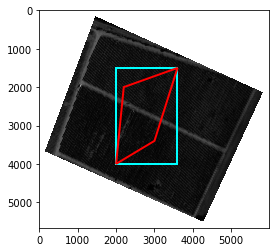

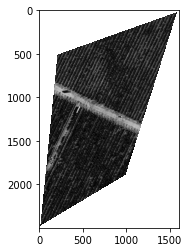

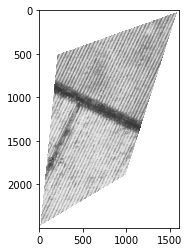

In [3]:
import matplotlib.patches as patches
import georasters as gr

List_P = [(2200,2000), (2000, 4000), (3000, 3400), (3600, 1500)]

im_multi_seg = im_multi.Segmentation(List_P)

epsilon = 0
x_rect = min([f[0] for f in List_P]) - epsilon
y_rect = min([f[1] for f in List_P]) - epsilon
h_rect = max([f[1] for f in List_P]) - min([f[1] for f in List_P]) + 2 * epsilon
w_rect = max([f[0] for f in List_P]) - min([f[0] for f in List_P]) + 2 * epsilon

plt.figure()
plt.imshow(im_multi.im_red.raster, cmap = 'gray')



ax = plt.gca()

rect = patches.Rectangle((x_rect, y_rect),
                 w_rect,
                 h_rect,
                 linewidth=2,
                 edgecolor='cyan',
                 fill = False)
ax.add_patch(rect)
poly = patches.Polygon(List_P,
                 linewidth=2,
                 edgecolor='red',
                 fill = False)


ax.add_patch(poly)



plt.figure()
plt.imshow(im_multi_seg.im_red.raster, cmap = 'gray')

plt.figure()
plt.imshow(im_multi_seg.OSAVI().raster, cmap = 'gray')

In [1]:
import numpy as np
import cv2


# convert to np.float32
Z = im_multi.NDVI().raster
Z = Z.data.copy()
Z = cv2.resize(Z,(100,100))

# define criteria, number of clusters(K) and apply kmeans()
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 3, 1.0)
K = 3
ret,label,center=cv2.kmeans(Z,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)

# Now convert back into uint8, and make original image
center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((img.shape))

plt.figure()
plt.imshow('res2',res2)


NameError: name 'im_multi' is not defined

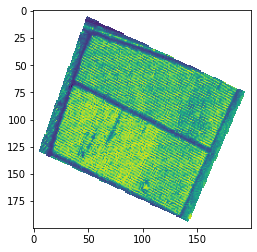

In [7]:
import cv2
Z = im_multi.NDVI().raster
Z = Z.data.copy()
Z = cv2.resize(Z,(200,200))
plt.imshow(Z)

Text(0.5, 1.0, 'Simplified levels')

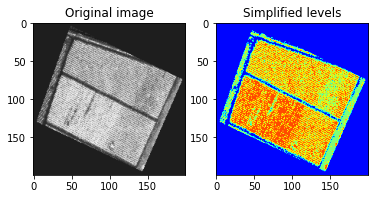

In [20]:
from sklearn import cluster
from skimage import data
import numpy as np
import matplotlib.pyplot as plt

def km_clust(array, n_clusters):
    
    # Create a line array, the lazy way
    X = array.reshape((-1, 1))
    # Define the k-means clustering problem
    k_m = cluster.KMeans(n_clusters=n_clusters, n_init=4)
    # Solve the k-means clustering problem
    k_m.fit(X)
    # Get the coordinates of the clusters centres as a 1D array
    values = k_m.cluster_centers_.squeeze()
    # Get the label of each point
    labels = k_m.labels_
    return(values, labels)
# Read the data as greyscale 
Z[np.isnan(Z)]= 0
img = Z
# Group similar grey levels using 8 clusters
values, labels = km_clust(img, n_clusters = 3)
# Create the segmented array from labels and values
img_segm = np.choose(labels, values)
# Reshape the array as the original image
img_segm.shape = img.shape
# Get the values of min and max intensity in the original image
vmin = img.min()
vmax = img.max()
fig = plt.figure(1)
# Plot the original image
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(img,cmap=plt.cm.gray, vmin=vmin, vmax=vmax)
ax1.set_title('Original image')
# Plot the simplified color image
ax2 = fig.add_subplot(1,2,2)
ax2.imshow(img_segm, cmap = 'jet', vmin=vmin, vmax=vmax)
ax2.set_title('Simplified levels')
